In [20]:
import torch
import pyro
import pyro.distributions as p
from pyro import infer, optim
import random
import matplotlib.pyplot as plt
import seaborn as sns

First lets generate some gaussian data from a multidimensional gaussian 
and we then try to approx. by a mixture of gaussians.

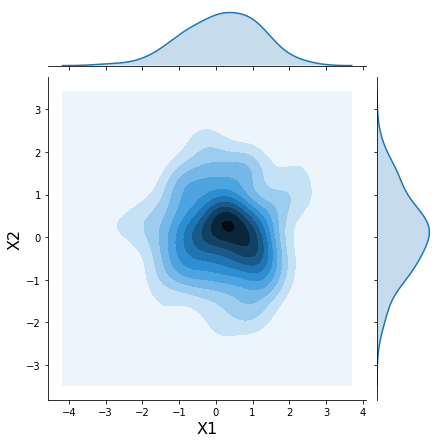

In [26]:
def generate_data(n):
    mu = torch.zeros([2])
    sigma = 1*torch.eye(2)
    data = p.MultivariateNormal(mu, sigma).expand([n]).independent(1).sample()
    return data

data = generate_data(100)
h = sns.jointplot(data[:, 0], data[:, 1], kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2', fontsize=16);

So the gaussian mixture model has the following generative model: 
$$ x \sim \prod_i^m \pi_i p_i(x)$$, where $p_i(x) = \mathcal{N}(\mu_i, \sigma_i)$. <br>
So in words: 1) Sample a mixture model according 




#### GMM
- N random variables that are observed, each distributed according to a mixture of K components. 
- N random latent variables specifying the identity of the mixture component of each observation. 

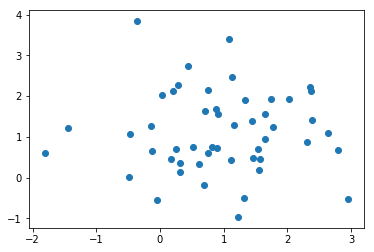

In [15]:
K = 2
N = data.shape[0]

def gmm_guide(data):
    param_mu = torch.zeros([K])
    param_sigma = torch.ones([K])
    
    with pyro.plate('mixture_hyper', K):
        mu = pyro.sample('mu', p.Normal(param_mu, 1))
        sigma = pyro.sample('sigma', p.Normal(param_sigma, 1))
    
    with pyro.plate('data', N):
        component_id = pyro.sample('comp_id', p.Categorical(weights))
    
    